# Visulalizing the netCDF data

#### This code reads.nc data from "4km_SWE_Depth_WY2021_v01.nc" and displays the data in Basemap

## This code reads the .nc data and displays the selected layer of USA. This displays the snow DEPTH of 120th day USA

6819
(180, 578, 79)


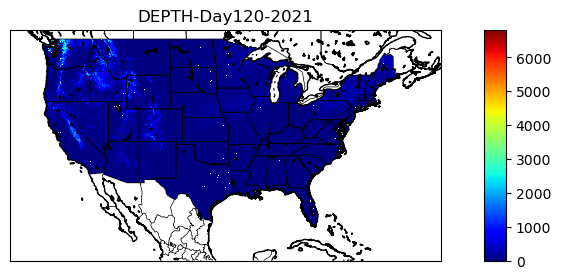

In [11]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the NetCDF file
data = Dataset(r'C:\Users\lenovo\Desktop\data_SWE\4km_SWE_Depth_WY2021_v01.nc') #give your data path

# Load necessary variables
crs = data.variables['crs'][:]
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
time_str = data.variables['time_str'][:]
SWE = data.variables['SWE'][:]
DEPTH = data.variables['DEPTH'][:]

# Create a Basemap instance
mp = Basemap(projection='merc',
             llcrnrlon=-130,
             llcrnrlat=20,
             urcrnrlon=-60,
             urcrnrlat=50,
             resolution='i')

# Create meshgrid for plotting
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

# Set fixed colorbar limits
vmin = np.min(DEPTH)  # Set global minimum for colorbar
vmax = np.max(DEPTH)  # Set global maximum for colorbar

#vmin = 0  # manually set the vmin
#vmax = 100  # manually set the vmax

print(vmax)
vmax_index = np.unravel_index(np.argmax(DEPTH, axis=None), DEPTH.shape)  # Get the index of the maximum value
print(vmax_index)

# Plot using pcolormesh with fixed vmin and vmax
day = 120 #give the day which you want to see
c_scheme = mp.pcolormesh(x, y, np.squeeze(DEPTH[day, :, :]), cmap='jet', vmin=vmin, vmax=vmax)

# Add map features
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

# Add a fixed colorbar
cbar = mp.colorbar(c_scheme, location='right', pad='10%')

# Add a title
plt.title('DEPTH-Day'+ str(day) + '-2021')
plt.savefig('snow depth.png', dpi=300, bbox_inches='tight')

# Show the plot
#plt.savefig(str(day)+'.jpg)
plt.show()

## This code reads the .nc data and displays the selected layer of USA. This displays the snow DEPTH of 120th day of New Mexico

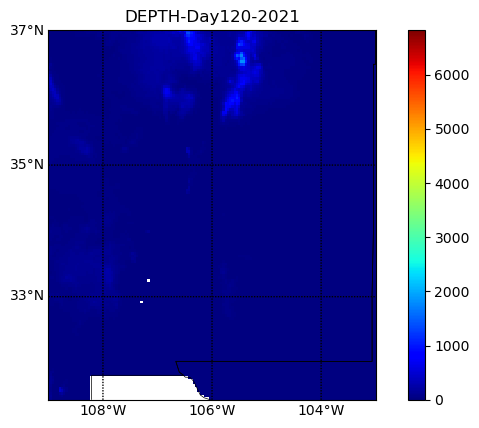

In [7]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the NetCDF file
data = Dataset(r'C:\Users\lenovo\Desktop\data_SWE\4km_SWE_Depth_WY2021_v01.nc')

# Load necessary variables
crs = data.variables['crs'][:]
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
time_str = data.variables['time_str'][:]
SWE = data.variables['SWE'][:]
DEPTH = data.variables['DEPTH'][:]

# Create a Basemap instance
mp = Basemap(projection='merc',
             llcrnrlon=-109,
             llcrnrlat=31.4,
             urcrnrlon=-103,
             urcrnrlat=37,
             resolution='i')

# Create meshgrid for plotting
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

# Set fixed colorbar limits
vmin = np.min(DEPTH)  # Set global minimum for colorbar
vmax = np.max(DEPTH)  # Set global maximum for colorbar

# Set fixed colorbar limits
#vmin = 0  # manually set the vmin
#vmax = 100  # manually set the vmax

# Plot using pcolormesh with fixed vmin and vmax
day = 120 #give the day which you want to see
c_scheme = mp.pcolormesh(x, y, np.squeeze(DEPTH[day, :, :]), cmap='jet', vmin=vmin, vmax=vmax)

# Add map features
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

# Add coordinate grid lines
parallels = np.arange(31.0, 38.0, 2.0)  # Latitude lines
meridians = np.arange(-110.0, -102.0, 2.0)  # Longitude lines
mp.drawparallels(parallels, labels=[1, 0, 0, 0], fontsize=10)  # Draw latitude lines
mp.drawmeridians(meridians, labels=[0, 0, 0, 1], fontsize=10)  # Draw longitude lines

# Add a fixed colorbar
cbar = mp.colorbar(c_scheme, location='right', pad='10%')

# Add a title
plt.title('DEPTH-Day' + str(day) + '-2021')
#plt.title('Snow depth May-1, 2021')

#Save Plot
plt.savefig('snow depth May-1, 2021.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
